In [1]:
import random
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
with open('train.p',mode='rb') as train_data:
    train=pickle.load(train_data)
with open('test.p',mode='rb') as test_data:
    test=pickle.load(test_data)
with open('valid.p',mode='rb') as valid_data:
    valid=pickle.load(valid_data)

In [7]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [8]:
x_train,y_train=train['features'],train['labels']
x_test,y_test=test['features'],test['labels']
x_valid,y_valid=valid['features'],valid['labels']

In [9]:
x_train.shape

(34799, 32, 32, 3)

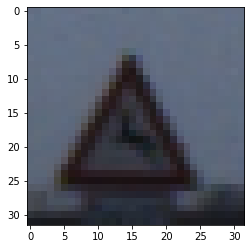

In [12]:
plt.imshow(x_train[600])

In [16]:
from sklearn.utils import shuffle

In [17]:
x_train,y_train=shuffle(x_train,y_train)

In [18]:
x_train_grey=np.sum(x_train/3,axis=3,keepdims=True)
x_test_grey=np.sum(x_test/3,axis=3,keepdims=True)
x_valid_grey=np.sum(x_valid/3,axis=3,keepdims=True)

In [21]:
x_train_norm=(x_train_grey-128)/128
x_test_norm=(x_test_grey-128)/128
x_valid_norm=(x_valid_grey-128)/128

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,AveragePooling2D
from sklearn.model_selection import train_test_split

In [26]:
x_test_norm.shape

(12630, 32, 32, 1)

In [42]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(120,activation='relu'))
cnn_model.add(Dense(84,activation='relu'))
cnn_model.add(Dense(100,activation='relu'))

In [43]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
cnn_model.fit(x_train_norm,y_train,epochs=10,batch_size=500,validation_data=(x_valid_norm,y_valid))

Epoch 1/10
70/70 [==============================] - 5s 63ms/step - loss: 6.6322 - accuracy: 0.0739 - val_loss: 6.4301 - val_accuracy: 0.0791
Epoch 2/10
70/70 [==============================] - 4s 64ms/step - loss: 5.7719 - accuracy: 0.1100 - val_loss: 6.7706 - val_accuracy: 0.0633
Epoch 3/10
70/70 [==============================] - 5s 66ms/step - loss: 5.9229 - accuracy: 0.1311 - val_loss: 7.1429 - val_accuracy: 0.0546
Epoch 4/10
70/70 [==============================] - 5s 67ms/step - loss: 6.1321 - accuracy: 0.1006 - val_loss: 4.6080 - val_accuracy: 0.0068
Epoch 5/10
70/70 [==============================] - 5s 68ms/step - loss: 4.6055 - accuracy: 0.0052 - val_loss: 4.6052 - val_accuracy: 0.0068
Epoch 6/10
70/70 [==============================] - 5s 65ms/step - loss: 4.6052 - accuracy: 0.0052 - val_loss: 4.6052 - val_accuracy: 0.0068
Epoch 7/10
70/70 [==============================] - 4s 64ms/step - loss: 4.6052 - accuracy: 0.0052 - val_loss: 4.6052 - val_accuracy: 0.0068
Epoch 8/10
70

In [ ]:
score = cnn_model.evaluate(x_test_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))